In [2]:
import matplotlib as mpl
mpl.__version__

'3.5.1'

In [3]:
import pandas as pd
pd.__version__

'1.4.2'

In [4]:
import numpy as np
np.__version__

'1.22.3'

In [116]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML

In [99]:
albums = pd.read_csv('data/albums.csv')
bands = pd.read_csv('data/bands.csv')
reviews = pd.read_csv('data/reviews.csv')

In [100]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [101]:
rev = (reviews[['album','score']].set_index('album') *100).astype(np.int64)#
rev

,score
album,
4,88
5,96
8,83
45,80
54,92
...,...
28061,89
28065,80
28065,80


In [102]:
a = []
for i in rev.index.unique():
    if len(rev.loc[i]) > 1:
        a.append(round(rev.loc[i].mean()['score']))
    else:
        a.append(round(rev.loc[i].mean()))
a[0:5]

[88, 96, 83, 80, 92]

In [103]:
rev = pd.DataFrame({'album': rev.index.unique(), 'score': a})
rev

,album,score
0,4,88
1,5,96
2,8,83
3,45,80
4,54,92
...,...,...
7900,28058,91
7901,28061,89
7902,28065,80
7903,28066,80


In [104]:
df = albums.merge(bands, 
                  left_on='band', 
                  right_on='id', 
                  suffixes=(None,'_r')).drop(['band', 'id_r'], 
                                             axis=1).merge(rev, 
                                                           left_on='id', 
                                                           right_on='album', 
                                                           suffixes=(None,None), 
                                                           how ='left').drop('album', 
                                                                             axis=1).set_index('id').convert_dtypes()
df

,title,year,name,country,status,formed_in,genre,theme,active,score
id,,,,,,,,,,
1,Taste the Hate,2014,('M') Inc.,United States,Unknown,2009,Death Metal,<NA>,2009-?,<NA>
2,The Bringer of Death,2014,.F.O.A.D.,France,Active,2009,Death Metal,Life and Death,2009-present,<NA>
3,Deception| Calculate What You Can't See,2005,100 Suns,United States,Active,2004,Death Metal,<NA>,2004-present,<NA>
4,Inti Huacay,1998,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,88
5,Génesis & horror,2002,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,96
...,...,...,...,...,...,...,...,...,...,...
28065,White Noise Paranormal,2010,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28066,Anomalies of the Forest,2011,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28067,Mother Earth Pantheon,2012,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,70


In [111]:
def convert(list_):
    temp = []
    for i in list_:
        temp.extend(i)
    return temp

def remove_all(list_, value):
    while list_.count(value):
        list_.remove(value)
    return list_

def years(y):
    y = y.split('|')
    for i in range(len(y)):
        w = y[i].split('-', 1)
        for k in range(len(w)):
            if w[k].find('(') != -1 or w[k].find(')') != -1 or w[k].find('?') != -1: #ignoring changed name bands
                w[k] = None
            elif w[k].find('present') != -1:
                w[k] = 2017
            else:
                w[k] = int(w[k])
        w = remove_all(w, None)
        if len(w) == 0:
            y[i] = []
        elif len(w) == 1:
            y[i] = w
        elif len(w) == 2:
            y[i] = list(range(w[0], w[1] + 1))
       
    y = convert(y)
    return y

df['active'] = df['active'].fillna('?').apply(years)
df['active']

id
1                                                   [2009]
2        [2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...
3        [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
4        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
5        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
                               ...                        
28065    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28066    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28067    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28068    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28069    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
Name: active, Length: 28069, dtype: object

In [134]:
contains = np.vectorize(lambda a, b: a.__contains__(b))

df['country'].count()#no NA

28069

1978
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


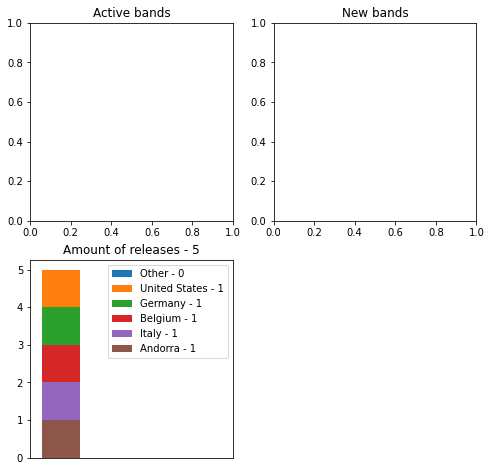

In [173]:
fig = plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'k']

class Animation():
  def __init__(self, fig, df):
    self.fig = fig 
    self.df = df
    self.active = fig.add_subplot(221)
    self.new = fig.add_subplot(222)
    self.release = fig.add_subplot(223)

  def update(self, year):
    print(year)
    self.active.clear()
    self.new.clear()
    self.release.clear()
    
    plt.title(f'Year - {year}')
    
    self.active.set_title('Active bands')
    self.new.set_title('New bands')
    
    country = df[df['year'] == year]['country'].value_counts()
    country['Other'] = country[5:].sum()
    country=country.sort_values()[::-1][:6]
    
    sum_ = country.sum()
    for l, v in country[::-1].items():
        self.release.bar(-4, sum_, label=f'{l} - {v}', width=1)
        sum_ -= v
    
    self.release.set_xticks([])
    self.release.set_xlim(-4.8, 0.5)
    self.release.legend()
    self.release.set_title(f'Amount of releases - {country.sum()}')
    
    #if array.size:
    #  self.ax.pie(array, labels=array.index, labeldistance=None)
    #  self.ax.legend()
    #else:
    #  self.ax.text(0.5,0.5,'No Data')
    return self.fig

obj = Animation(fig, df)
anim = ani.FuncAnimation(fig, obj.update,
                         frames = range(1978, 2018),
                         repeat = False,
                         interval=500)


HTML(anim.to_html5_video())

In [154]:

c = df[df['year'] == 2016]['country'].value_counts()
c['Other'] = c[3:].sum()
c = c.sort_values()[::-1][:4]
for l,v in c[::-1].items():
    print(l,v)

Sweden 82
Germany 143
United States 378
Other 1082
